# Do the Hello World example on  a 2-qubit Bell State

## Step 1: Map the problem to circuits and operators

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)  # Apply Hadamard gate to the first qubit
qc.cx(0, 1)  # Apply CNOT gate with control qubit 0 and target qubit 1

qc.draw(output='mpl')  # Draw the circuit

In [16]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

## Step 2: Optimise the circuits and operators

## Step 3: Execute on the backend

In [17]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.        , 0.00195312, 0.00195312, 1.        , 0.00976562,
       0.00976562]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0152253, 'sample_measure_time': 0.0020367, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 8040, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 6, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999961853027344, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0152253, 'sample_measure_time': 0.0020367, 'in

## Step 4: Analyze the results

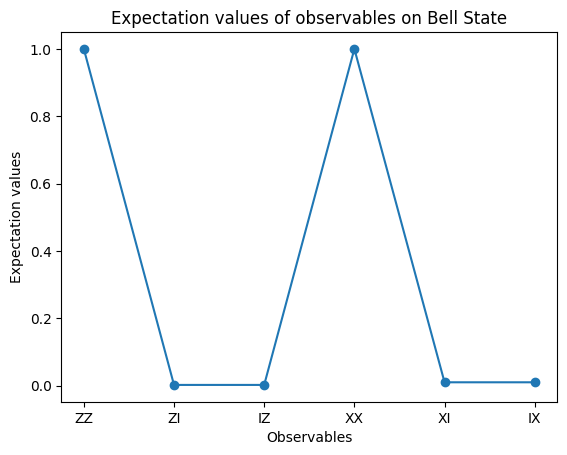

In [18]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.title('Expectation values of observables on Bell State')
plt.show()